<a href="https://colab.research.google.com/github/TrongAdonis/DataAnalystDeepLearning/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Botplox
Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

median (Q2/50th Percentile): the middle value of the dataset.

first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

interquartile range (IQR): 25th to the 75th percentile. whiskers (shown in blue)

outliers (shown as green circles)

“maximum”: Q3 + 1.5*IQR

“minimum”: Q1 -1.5*IQR

Nguồn (https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

In [1]:
import pandas as pd
datatitanic = pd.read_csv("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")

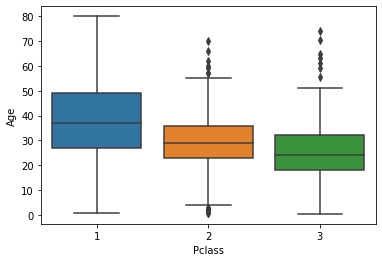

In [2]:
import seaborn as sns
sns.boxplot(y='Age', x='Pclass', data = datatitanic)

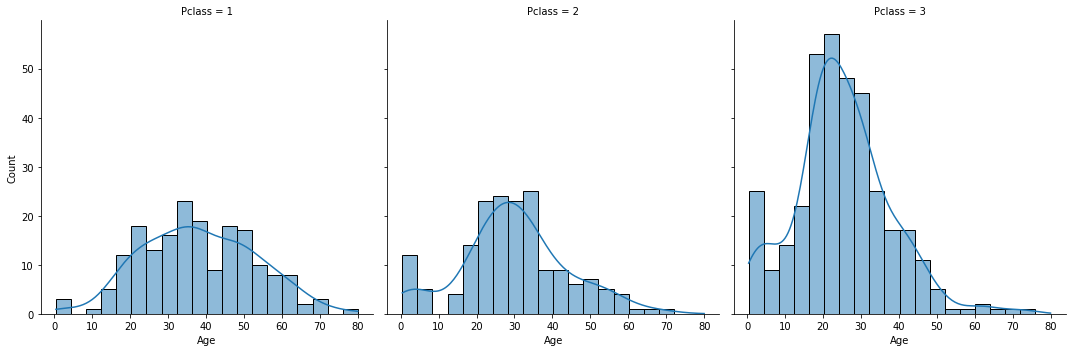

In [3]:
sns.displot(datatitanic, x="Age", col="Pclass", kde=True)

# Plotting with categorical data
Tham khảo: https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial

In the relational plot tutorial we saw how to use different visual representations to show the relationship between multiple variables in a dataset. In the examples, we focused on cases where the main relationship was between two numerical variables. If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

In seaborn, there are several different ways to visualize a relationship involving categorical data. Similar to the relationship between relplot() and either scatterplot() or lineplot(), there are two ways to make these plots. There are a number of axes-level functions for plotting categorical data in different ways and a figure-level interface, catplot(), that gives unified higher-level access to them.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


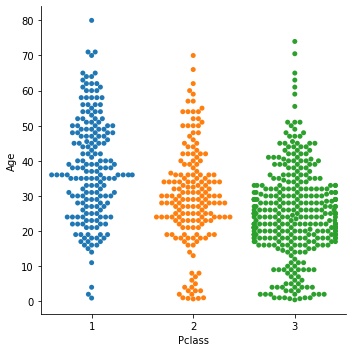

In [4]:
sns.catplot(x="Pclass", y="Age", kind="swarm",data=datatitanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


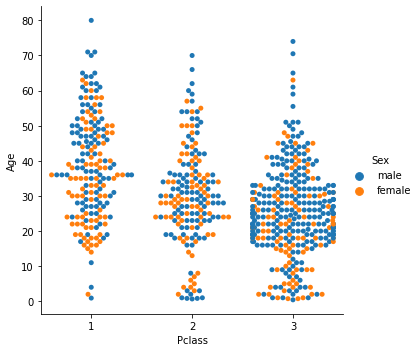

In [5]:
sns.catplot(x="Pclass", y="Age", hue='Sex', kind="swarm",data=datatitanic)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


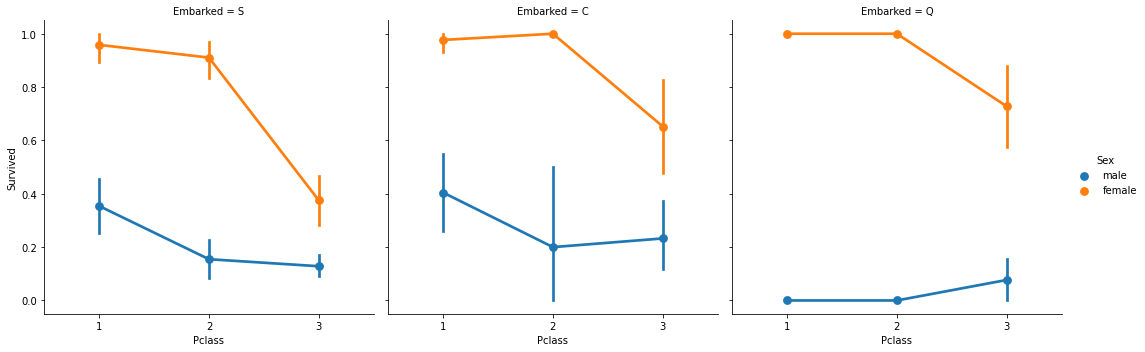

In [6]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=datatitanic)

# PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING
1 Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

2 Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

3 Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.
Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name


1 Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và 
female  F

2 Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau
Sử dụng Seaborn để vẽ biểu đồ (Box plot) trực quan dữ liệu để xác định phân phối tuổi trên từng hạng hành khách. Nhận xét về tuổi trung bình giữa các nhóm hành khách. Từ đó đưa ra quyết định cách thay thế giá trị tuổi bị thiếu. b. Tiến hành thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.

1 Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

2 Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName

3 Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

4 Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

5 Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

1

In [7]:
import pandas as pd
def load_data(titanic):
  df = pd.read_csv(titanic)
  return df

In [8]:
data_titanic = load_data("https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/titanic_disaster.csv")

In [9]:
data_titanic.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S
5            6         0       3  ...   8.4583   NaN         Q
6            7         0       1  ...  51.8625   E46         S
7            8         0       3  ...  21.0750   NaN         S
8            9         1       3  ...  11.1333   NaN         S
9           10         1       2  ...  30.0708   NaN         C

[10 rows x 12 columns]

2

In [10]:
data_titanic_NaN = data_titanic[data_titanic.isna().any(axis=1)]
data_titanic_NaN.head(10)

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0             1         0       3  ...   7.2500   NaN         S
2             3         1       3  ...   7.9250   NaN         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
12           13         0       3  ...   8.0500   NaN         S
13           14         0       3  ...  31.2750   NaN         S
14           15         0       3  ...   7.8542   NaN         S

[10 rows x 12 columns]

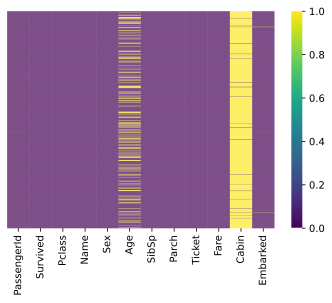

In [11]:
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(data_titanic_NaN.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

3

In [12]:

data_titanic[['Firstname', 'secondName']]=data_titanic['Name'].str.split(",",expand = True)

In [13]:
data_titanic = data_titanic.drop('Name',axis=1)
data_titanic

PassengerId  ...                                   secondName
0              1  ...                              Mr. Owen Harris
1              2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2              3  ...                                  Miss. Laina
3              4  ...           Mrs. Jacques Heath (Lily May Peel)
4              5  ...                            Mr. William Henry
..           ...  ...                                          ...
886          887  ...                                  Rev. Juozas
887          888  ...                         Miss. Margaret Edith
888          889  ...               Miss. Catherine Helen "Carrie"
889          890  ...                              Mr. Karl Howell
890          891  ...                                  Mr. Patrick

[891 rows x 13 columns]

4

In [14]:
data_titanic['Sex'].replace({'male':'M','female':'F'},inplace=True)

In [15]:
data_titanic.head(5)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry

[5 rows x 13 columns]

5

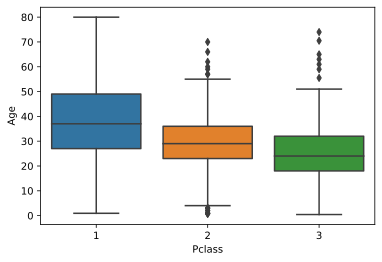

In [16]:
sns.boxplot(y='Age', x='Pclass', data = data_titanic)

In [17]:
data_titanic['Age'].fillna(round(data_titanic['Age'].mean()), inplace= True)

In [18]:
data_titanic.head(10)

PassengerId  ...                                   secondName
0            1  ...                              Mr. Owen Harris
1            2  ...   Mrs. John Bradley (Florence Briggs Thayer)
2            3  ...                                  Miss. Laina
3            4  ...           Mrs. Jacques Heath (Lily May Peel)
4            5  ...                            Mr. William Henry
5            6  ...                                    Mr. James
6            7  ...                                Mr. Timothy J
7            8  ...                        Master. Gosta Leonard
8            9  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9           10  ...                  Mrs. Nicholas (Adele Achem)

[10 rows x 13 columns]

In [19]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.heatmap(data_titanic.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

6

In [20]:
data_titanic.loc[(data_titanic['Age'] <= 12), 'Agegroup'] = 'Kid'
data_titanic.loc[(data_titanic['Age'] > 12) & (data_titanic['Age'] <= 18), 'Agegroup'] = 'Teen'
data_titanic.loc[(data_titanic['Age'] > 18) & (data_titanic['Age'] <= 60), 'Agegroup'] = 'Adult'
data_titanic.loc[(data_titanic['Age'] > 60), 'Agegroup'] = 'Older'

In [21]:
data_titanic.head(10)

PassengerId  Survived  ...                                   secondName Agegroup
0            1         0  ...                              Mr. Owen Harris    Adult
1            2         1  ...   Mrs. John Bradley (Florence Briggs Thayer)    Adult
2            3         1  ...                                  Miss. Laina    Adult
3            4         1  ...           Mrs. Jacques Heath (Lily May Peel)    Adult
4            5         0  ...                            Mr. William Henry    Adult
5            6         0  ...                                    Mr. James    Adult
6            7         0  ...                                Mr. Timothy J    Adult
7            8         0  ...                        Master. Gosta Leonard      Kid
8            9         1  ...     Mrs. Oscar W (Elisabeth Vilhelmina Berg)    Adult
9           10         1  ...                  Mrs. Nicholas (Adele Achem)     Teen

[10 rows x 14 columns]

7

In [22]:
secondName=data_titanic['secondName']
for i in range(len(secondName)):
  x = str(secondName[i])
  data_titanic['namePrefix'] = secondName.apply(lambda x: x[5:] if 'Mr.' in x else (x[6:] if 'Mrs.' in x else (x[7:] if 'Miss' in x else (x[9:] if 'Master' in x else None))))

In [23]:
data_titanic.head(5)

PassengerId  Survived  ...  Agegroup                             namePrefix
0            1         0  ...     Adult                            Owen Harris
1            2         1  ...     Adult  John Bradley (Florence Briggs Thayer)
2            3         1  ...     Adult                                  Laina
3            4         1  ...     Adult          Jacques Heath (Lily May Peel)
4            5         0  ...     Adult                          William Henry

[5 rows x 15 columns]

8

In [24]:
data_titanic['familySize'] = 1 + data_titanic['SibSp'] + data_titanic['Parch']

In [25]:
data_titanic.head(5)

PassengerId  Survived  ...                             namePrefix familySize
0            1         0  ...                            Owen Harris          2
1            2         1  ...  John Bradley (Florence Briggs Thayer)          2
2            3         1  ...                                  Laina          1
3            4         1  ...          Jacques Heath (Lily May Peel)          2
4            5         0  ...                          William Henry          1

[5 rows x 16 columns]

9

In [26]:
for i in data_titanic['familySize']:
  if i == 0:
    data_titanic['Alone'] = 1
  else:
    data_titanic['Alone'] = 0

In [27]:
data_titanic.head(5)

PassengerId  Survived  ...  familySize Alone
0            1         0  ...           2     0
1            2         1  ...           2     0
2            3         1  ...           1     0
3            4         1  ...           2     0
4            5         0  ...           1     0

[5 rows x 17 columns]

10

In [28]:
data_titanic['typeCabin'] = data_titanic['Cabin'].fillna('Unknown')
typeCabin = data_titanic['typeCabin']
for i in range(len(typeCabin)):
  x = str(typeCabin[i])
  if x != 'Unknown':
    typeCabin[i] = x[:1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
data_titanic.head(5)

PassengerId  Survived  Pclass  ... familySize  Alone  typeCabin
0            1         0       3  ...          2      0    Unknown
1            2         1       1  ...          2      0          C
2            3         1       3  ...          1      0    Unknown
3            4         1       1  ...          2      0          C
4            5         0       3  ...          1      0    Unknown

[5 rows x 18 columns]